# ANEXO: Modelo para estimar sensibilidad riesgo sistémico

In [1]:
#============================================================================
#==============Modelo de regresion para estimar riesgo sistemico=============
#=============================================================================

#---cargando las librerias

from statsmodels.compat import lzip

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.stats.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.sandbox.regression.predstd import wls_prediction_std





In [2]:
#---Cargando la base de datos

base=pd.read_excel('F:\CONSULTORIAS\Financiero\Para Prueba\ModeloBCR_Py\Base.xlsx', 'Hoja1', index_col=None, na_values=['NA'])
base.head(3)

,Corr,Año,r_liquidez,r_solvencia1,r_solvencia2,r_morosidad1,r_morosidad2,r_riesgo1,r_patrimonio,r_cartera,...,r_rentabilidad2,LiquidezTotal,M1,Concentracion,Deuda,PIB_Usa,Transferencias,CuentaCorri,PIB,Reservas
0,1,2004,36.07,13.40,9.56,2.33,132.32,2.86,41.68,5.95,...,1.02,8137.054188,1361.271042,1870.755124,6050.42,14406.4,2547.6,-541.58,8167.72,1886.761
1,2,2005,33.47,13.53,10.17,1.92,126.67,2.39,35.74,10.95,...,1.18,9581.413594,1455.230981,1870.755124,6456.04,14912.5,3017.3,-527.99,8458.70,1827.954
2,3,2006,32.25,13.79,10.66,1.92,116.38,2.19,33.49,12.91,...,1.50,9729.804630,1656.465542,1869.367696,7033.08,15338.3,3470.8,-668.76,8789.62,1905.801


In [3]:
#----Comprobando las correlaciones
d=base.corr()
d.head(3)

,Corr,Año,r_liquidez,r_solvencia1,r_solvencia2,r_morosidad1,r_morosidad2,r_riesgo1,r_patrimonio,r_cartera,...,r_rentabilidad2,LiquidezTotal,M1,Concentracion,Deuda,PIB_Usa,Transferencias,CuentaCorri,PIB,Reservas
Corr,1.000000,1.000000,-0.367495,0.663462,0.795556,-0.133428,0.014652,-0.215537,-0.895597,-0.174907,...,-0.057125,0.938111,0.984309,-0.109728,0.985053,0.962211,0.925739,-0.098889,0.970463,0.838345
Año,1.000000,1.000000,-0.367495,0.663462,0.795556,-0.133428,0.014652,-0.215537,-0.895597,-0.174907,...,-0.057125,0.938111,0.984309,-0.109728,0.985053,0.962211,0.925739,-0.098889,0.970463,0.838345
r_liquidez,-0.367495,-0.367495,1.000000,0.098758,-0.147376,0.815641,-0.584228,0.876027,0.679900,-0.730445,...,-0.414551,-0.265121,-0.242320,-0.227321,-0.353619,-0.478283,-0.432111,0.479074,-0.420502,0.001662


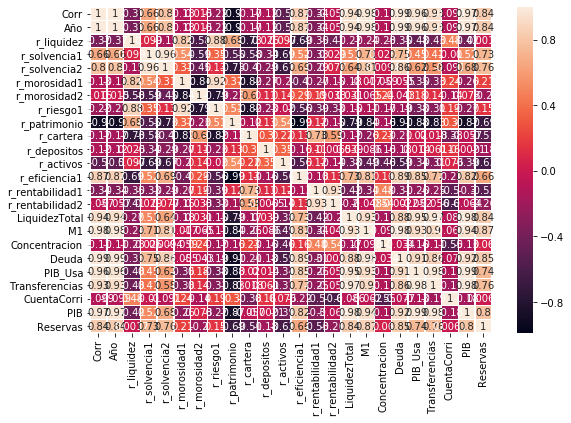

In [4]:
#--Graficando las correlaciones
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(d, annot=True,linewidths=.5, ax=ax)

In [5]:
#--guardando las correlaciones
d.to_excel('F:\CONSULTORIAS\Financiero\Para Prueba\ModeloBCR_Py\Correlaciones.xlsx', sheet_name='Corr')

In [6]:
#--Creando el modelo
results2=smf.ols('LiquidezTotal ~ r_liquidez+r_patrimonio+np.log(r_morosidad1)+base.r_riesgo1', data=base).fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:          LiquidezTotal   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     47.37
Date:                Sun, 05 Jan 2020   Prob (F-statistic):           1.82e-06
Time:                        16:31:31   Log-Likelihood:                -112.31
No. Observations:                  15   AIC:                             234.6
Df Residuals:                      10   BIC:                             238.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             7973.3843 

C:\Users\Elias\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [7]:
#--Normalidad
#--Prueba Jarque Bera
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(results2.resid)
lzip(name, test)

[('Jarque-Bera', 0.2681612528329159),
 ('Chi^2 two-tail prob.', 0.8745195523831674),
 ('Skew', 0.1983912155992784),
 ('Kurtosis', 3.5211733942027625)]

In [8]:
#--Normalidad
#--Omni test:
name = ['Chi^2', 'Two-tail probability']
test = sms.omni_normtest(results2.resid)
lzip(name, test)

[('Chi^2', 1.6211359053298857), ('Two-tail probability', 0.44460547963411146)]

In [9]:
#--Influence tests
from statsmodels.stats.outliers_influence import OLSInfluence
test_class = OLSInfluence(results2)
test_class.dfbetas[:5,:]

array([[ 0.31903536, -0.24554504, -0.4004121 , -0.35298011,  0.56753893],
       [-0.03616643,  0.00947251, -0.17271616,  0.04536547,  0.03148353],
       [ 0.06586953, -0.05436694,  0.13274073, -0.0115668 , -0.00710033],
       [ 0.0773802 , -0.0061594 ,  0.16733956, -0.17863066,  0.06629673],
       [-0.33510091,  0.28245747, -0.11214244,  0.23649744, -0.3992023 ]])

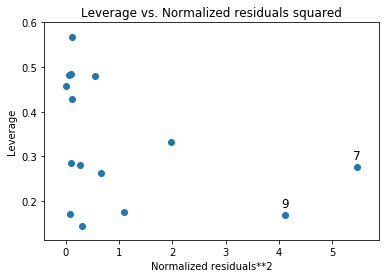

In [10]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig = plot_leverage_resid2(results2, ax = ax)

In [11]:
#--Multicolinealidad
np.linalg.cond(results2.model.exog)

749.3469829384873

In [12]:
#--Heteroskedasticity tests (Breush-Pagan test)
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(results2.resid, results2.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 2.5991961965149013),
 ('p-value', 0.6269655208825462),
 ('f-value', 0.5239975242137991),
 ('f p-value', 0.720771021878027)]

In [13]:
#--Goldfeld-Quandt test
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(results2.resid, results2.model.exog)
lzip(name, test)

[('F statistic', 6.4207831458893025), ('p-value', 0.08241090881237588)]

In [14]:
resid_val=results2.resid
fitted_val=results2.predict()
results2.resid.mean()

1.4430649268130462e-11

In [15]:
#------Modelo 2
x=pd.DataFrame({'Liquidez':base.r_liquidez,'Patrimonio':base.r_patrimonio,'Morosidad':np.log(base.r_morosidad1),'Riesgo':base.r_riesgo1})
x.head(5)

,Liquidez,Patrimonio,Morosidad,Riesgo
0,36.07,41.68,0.845868,2.86
1,33.47,35.74,0.652325,2.39
2,32.25,33.49,0.652325,2.19
3,34.04,29.94,0.717840,3.27
4,35.75,31.41,1.026042,7.39


In [16]:
y=base.LiquidezTotal

In [17]:
y

0      8137.054188
1      9581.413594
2      9729.804630
3     11392.453574
4     11519.448172
5     11551.871161
6     11351.023372
7     11504.248965
8     11878.768493
9     12049.560745
10    11978.814525
11    13290.486840
12    13873.017266
13    14979.032027
14    15804.492767
Name: LiquidezTotal, dtype: float64

In [18]:
import statsmodels.api as sm
x_constant=sm.add_constant(x)
Modelo=sm.OLS(y,x_constant).fit()
Modelo.summary()

C:\Users\Elias\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          LiquidezTotal   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     47.37
Date:                Sun, 05 Jan 2020   Prob (F-statistic):           1.82e-06
Time:                        16:31:32   Log-Likelihood:                -112.31
No. Observations:                  15   AIC:                             234.6
Df Residuals:                      10   BIC:                             238.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7973.3843   2489.433      3.203      0.009    2426.583    1.35e+04
Liquidez     328.8745     85.695      3.838      0.003     137.933     519.816
Patrimonio  -149.9215     11.690    -12.825      0.000    -175.968    -123.875
Morosidad  -8536.8702   1361.455     -6.270      0.000   -1.16e+04   -5503.358
Riesgo       730.9542    170.435      4.289      0.002     351.201    1110.707
==============================================================================
Omnibus:                        1.621   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.445   Jarque-Bera (JB):                0.268
Skew:                           0.198   Prob(JB):                        0.875
Kurtosis:                       3.521   Cond. No.                         749.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
residuos=Modelo.resid
fitted=Modelo.predict()
Modelo.resid.mean()

1.418811734765768e-11

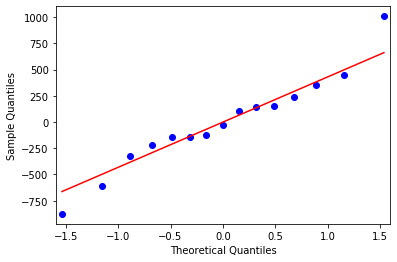

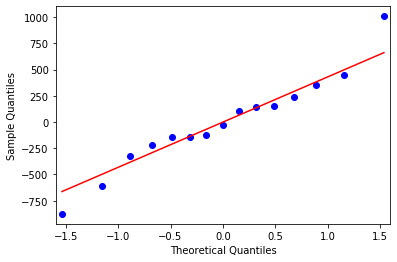

In [20]:
#--Normalidad
from scipy import stats
stats.shapiro(Modelo.resid)
sm.qqplot(residuos,line='s')

In [21]:
stats.shapiro(Modelo.resid)

(0.9715871214866638, 0.8808257579803467)

Text(0.5, 1.0, 'Fitted vrs Observados')

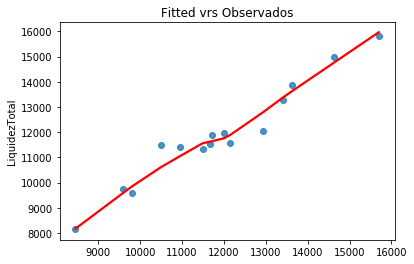

In [22]:
#--Linealidad
sns.regplot(x=fitted,y=y, lowess=True,line_kws={'color':'red'})
plt.title('Fitted vrs Observados')

Text(0.5, 1.0, 'Fitted vrs Residuals')

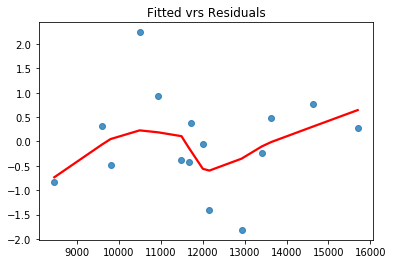

In [23]:
#--Homocedasticidad
resid_stand=Modelo.get_influence().resid_studentized_internal
sns.regplot(x=fitted,y=resid_stand,lowess=True,line_kws={'color':'red'})
plt.title('Fitted vrs Residuals')

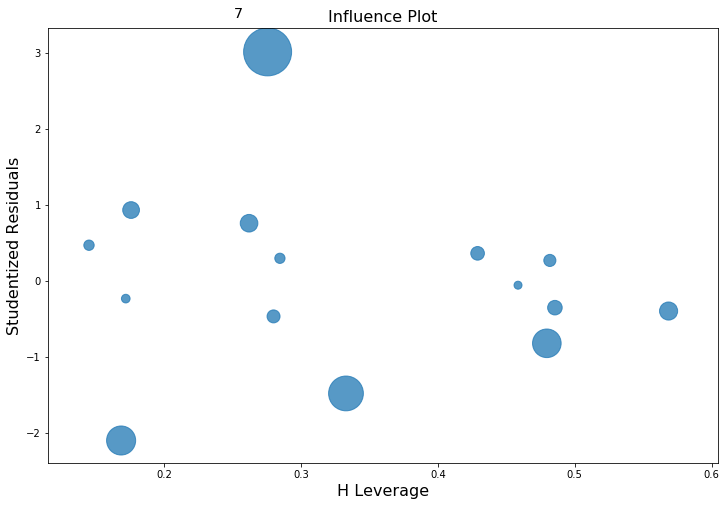

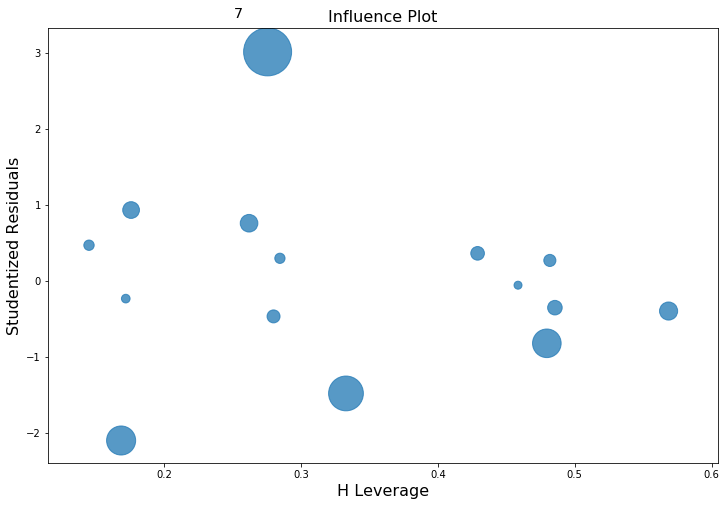

In [24]:
#--Influencia
fig,ax=plt.subplots(figsize=(12,8))
sm.graphics.influence_plot(Modelo,alpha=0.05,ax=ax,criterion='cooks')

In [25]:
#---Homosedasticidad
bp_test=sms.het_breuschpagan(residuos,Modelo.model.exog)
print(bp_test)
print("Breuschpagan test: pvalue =",bp_test[1])

(2.5991961965148977, 0.6269655208825469, 0.5239975242137982, 0.7207710218780274)
Breuschpagan test: pvalue = 0.6269655208825469


In [26]:
#---Autocorrelacion
from scipy.stats.stats import pearsonr
x.columns
pearsonr(x['Liquidez'],Modelo.resid)

(4.6384637922934876e-14, 1.0)

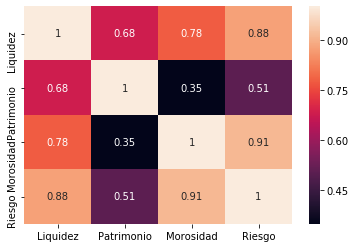

In [27]:
sns.heatmap(x.corr(),annot=True)

In [28]:
#---Multicolinealidad
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(x_constant.values,i) for i in range (x_constant.shape[1])]
pd.DataFrame({'vif':vif[1:]}, index=x.columns).T

,Liquidez,Patrimonio,Morosidad,Riesgo
vif,6.38154,2.199124,6.788268,10.510899


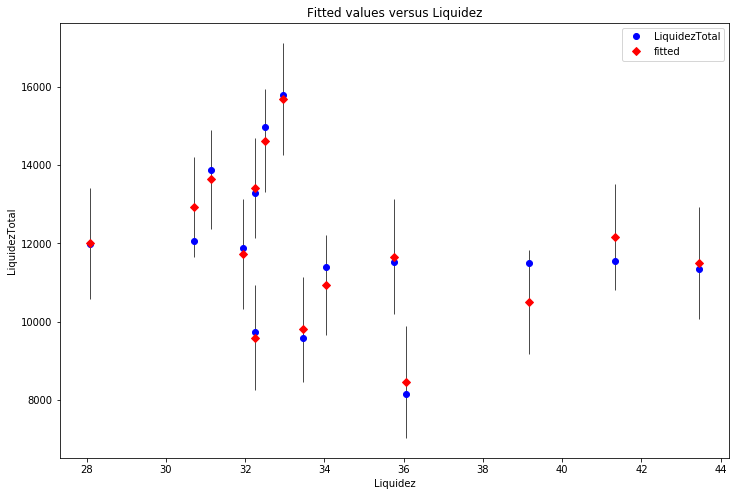

In [29]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(Modelo, "Liquidez", ax=ax)

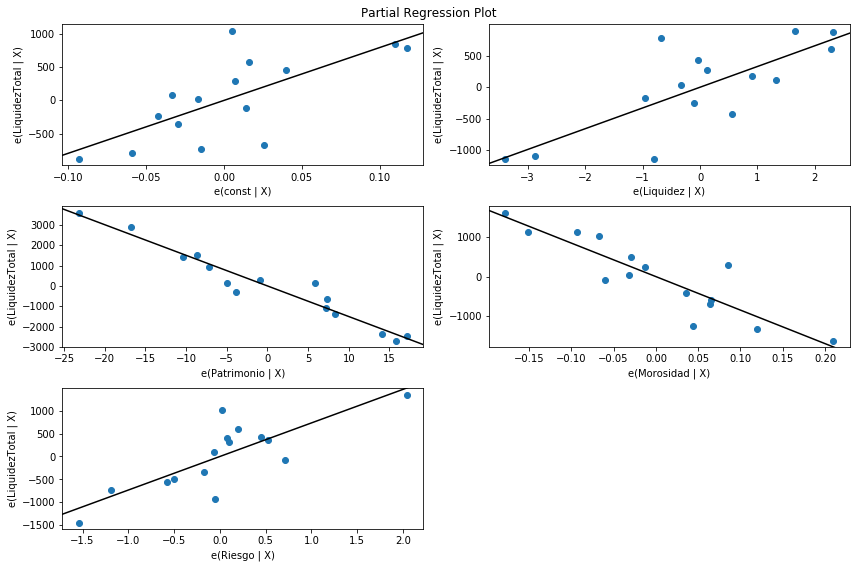

In [30]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(Modelo, fig=fig)

In [56]:
print('Parameters: ', Modelo.params)
print('Standard errors: ', Modelo.bse)
print('Predicted values: ', Modelo.predict())

Parameters:  const         7973.384262
Liquidez       328.874464
Patrimonio    -149.921494
Morosidad    -8536.870217
Riesgo         730.954163
dtype: float64
Standard errors:  const         2489.432574
Liquidez        85.695396
Patrimonio      11.689878
Morosidad     1361.455476
Riesgo         170.435030
dtype: float64
Predicted values:  [ 8456.61959305  9800.78337356  9590.68905657 10941.73644983
 11664.17954884 12157.84065987 11491.76805425 10494.73284467
 11727.39754072 12925.56299718 12002.63103034 13409.35032752
 13634.18232525 14626.75892448 15697.25759181]


In [42]:
Modelo.fittedvalues

0      8456.619593
1      9800.783374
2      9590.689057
3     10941.736450
4     11664.179549
5     12157.840660
6     11491.768054
7     10494.732845
8     11727.397541
9     12925.562997
10    12002.631030
11    13409.350328
12    13634.182325
13    14626.758924
14    15697.257592
dtype: float64

In [43]:
y

0      8137.054188
1      9581.413594
2      9729.804630
3     11392.453574
4     11519.448172
5     11551.871161
6     11351.023372
7     11504.248965
8     11878.768493
9     12049.560745
10    11978.814525
11    13290.486840
12    13873.017266
13    14979.032027
14    15804.492767
Name: LiquidezTotal, dtype: float64

In [46]:
x=Modelo.fittedvalues
x

0      8456.619593
1      9800.783374
2      9590.689057
3     10941.736450
4     11664.179549
5     12157.840660
6     11491.768054
7     10494.732845
8     11727.397541
9     12925.562997
10    12002.631030
11    13409.350328
12    13634.182325
13    14626.758924
14    15697.257592
dtype: float64

In [47]:
tabla=pd.DataFrame({'x':x,'y':y })
tabla

,x,y
0,8456.619593,8137.054188
1,9800.783374,9581.413594
2,9590.689057,9729.804630
3,10941.736450,11392.453574
4,11664.179549,11519.448172
5,12157.840660,11551.871161
6,11491.768054,11351.023372
7,10494.732845,11504.248965
8,11727.397541,11878.768493
9,12925.562997,12049.560745


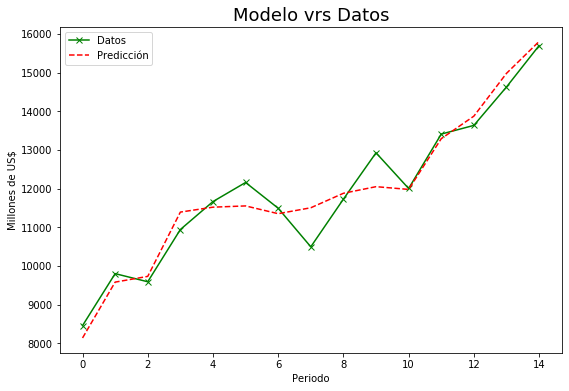

In [53]:
fig,ax=plt.subplots(figsize=(9, 6))
plt.plot(tabla.x,'-g',label="Datos",marker='x')
plt.plot(tabla.y,'--r',label="Predicción")
plt.title("Modelo vrs Datos", size=18)
plt.xlabel("Periodo")
plt.ylabel("Millones de US$")
plt.legend(loc="upper left")

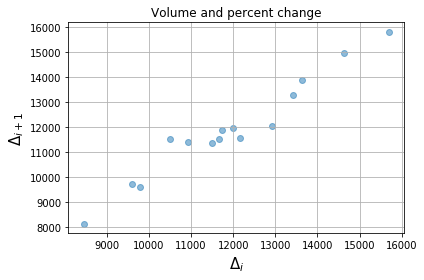

In [50]:
fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

In [5]:
help(scatter)

NameError: name 'scatter' is not defined